In [45]:
import pandas as pd
file_path = "../data_analysis_reports/Sample_Data.xlsx"
data = pd.read_excel(file_path)
#data

In [46]:
data = data.drop(columns=['ActiveWeight_P20', 'ActiveWeight_P2','ActiveWeight_P9','ActiveWeight_P14',"Year","Month"])

data=data.drop(index=6)
data.shape

(56, 23)

In [47]:
test=data.iloc[[-1]]
#test

In [48]:
# Dropping rows with null values in 'Payment Amount'
data= data.dropna(subset=['Payment Amount'])
#data

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
#correlation_matrix = data.corr()

# Plotting the correlation heatmap
#plt.figure(figsize=(15, 10))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap Showing Relationship with Payment Amount')
#plt.show()

In [51]:
missing_values = data.isnull().sum()
missing_values

InsuredCount        0
ChildLessThan18     0
AdultLessThan40     0
MiddleLessThan55    0
OldGreaterThan55    0
ActiveWeight_P1     0
ActiveWeight_P3     0
ActiveWeight_P4     0
ActiveWeight_P5     0
ActiveWeight_P6     0
ActiveWeight_P7     0
ActiveWeight_P8     0
ActiveWeight_P10    0
ActiveWeight_P11    0
ActiveWeight_P12    0
ActiveWeight_P13    0
ActiveWeight_P15    0
ActiveWeight_P16    0
ActiveWeight_P17    0
ActiveWeight_P18    0
ActiveWeight_P19    0
ActiveWeight_P21    0
Payment Amount      0
dtype: int64

In [52]:
X = data.drop(columns=["Payment Amount"])
y = data[["Payment Amount"]]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

missing_values, X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

(InsuredCount        0
 ChildLessThan18     0
 AdultLessThan40     0
 MiddleLessThan55    0
 OldGreaterThan55    0
 ActiveWeight_P1     0
 ActiveWeight_P3     0
 ActiveWeight_P4     0
 ActiveWeight_P5     0
 ActiveWeight_P6     0
 ActiveWeight_P7     0
 ActiveWeight_P8     0
 ActiveWeight_P10    0
 ActiveWeight_P11    0
 ActiveWeight_P12    0
 ActiveWeight_P13    0
 ActiveWeight_P15    0
 ActiveWeight_P16    0
 ActiveWeight_P17    0
 ActiveWeight_P18    0
 ActiveWeight_P19    0
 ActiveWeight_P21    0
 Payment Amount      0
 dtype: int64,
 (39, 22),
 (10, 22),
 (39, 1),
 (10, 1))

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model    
    r2 = r2_score(y_test, y_pred)

    return r2

In [55]:
# Linear Regression Model
linear_model = LinearRegression()

# Train and evaluate the Linear Regression model
linear_r2 = train_and_evaluate_model(linear_model, X_train_scaled, y_train, X_test_scaled, y_test)

linear_r2


0.8082454360581095

In [56]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
# MultiOutputRegressor with Gradient Boosting
multioutput_gb_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

# Train and evaluate the MultiOutput Gradient Boosting model
gb_multi_r2 = train_and_evaluate_model(multioutput_gb_model, X_train_scaled, y_train, X_test_scaled, y_test)

gb_multi_r2

0.7815587609470134

In [57]:
test

,InsuredCount,ChildLessThan18,AdultLessThan40,MiddleLessThan55,OldGreaterThan55,ActiveWeight_P1,ActiveWeight_P3,ActiveWeight_P4,ActiveWeight_P5,ActiveWeight_P6,...,ActiveWeight_P11,ActiveWeight_P12,ActiveWeight_P13,ActiveWeight_P15,ActiveWeight_P16,ActiveWeight_P17,ActiveWeight_P18,ActiveWeight_P19,ActiveWeight_P21,Payment Amount
56,286376,42845,181428,56136,5964,5502624,1010818,826080,776490,2130510,...,155780,162560,3174290,132420,259610,2798850,2798820,1810170,659340,NaN


In [58]:
# Extract the last row from the original data

#last_row = data.iloc[[-1]]

last_row = test


# Drop the target column from the last row
X_last_row = last_row.drop(columns=["Payment Amount"])

# Scale the features of the last row using the same scaler
X_last_row_scaled = scaler.transform(X_last_row)


claim_amount_prediction_linear = linear_model.predict(X_last_row_scaled)
claim_amount_prediction_gb_multi = multioutput_gb_model.predict(X_last_row_scaled)

In [59]:
# Predicted claim amount using Linear Regression
claim_amount_prediction_linear_str = "{:,.2f}".format(claim_amount_prediction_linear[0][0])
print("Predicted claim amount using Linear Regression:", claim_amount_prediction_linear_str)

# Predicted claim amount using MultiOutput Gradient Boosting
claim_amount_prediction_gb_multi_str = "{:,.2f}".format(claim_amount_prediction_gb_multi[0][0])
print("Predicted claim amount using MultiOutput Gradient Boosting:", claim_amount_prediction_gb_multi_str)


Predicted claim amount using Linear Regression: 86,721,955.91
Predicted claim amount using MultiOutput Gradient Boosting: 63,958,167.36


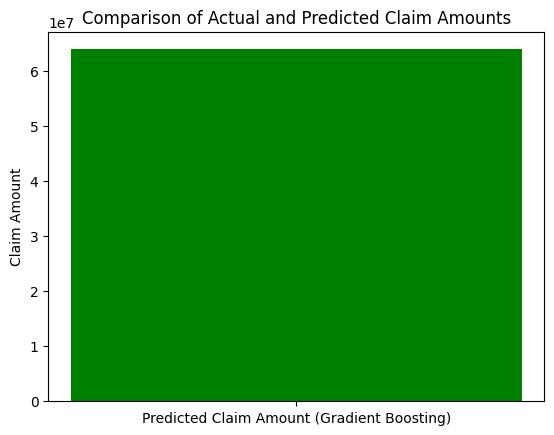

Actual Claim Amount: nan
Predicted Claim Amount: 63958167.363921136
Absolute difference: nan


In [60]:
import matplotlib.pyplot as plt

# Actual claim amount from the last row
actual_claim_amount = last_row["Payment Amount"].values[0]

# Predicted claim amount using Gradient Boosting
predicted_claim_amount_gb = claim_amount_prediction_gb_multi[0][0]

# Calculate the absolute difference
difference = abs(actual_claim_amount - predicted_claim_amount_gb)

# Plotting the comparison
labels = ['Actual Claim Amount', 'Predicted Claim Amount (Gradient Boosting)']
values = [actual_claim_amount, predicted_claim_amount_gb]

plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.ylabel('Claim Amount')
plt.title('Comparison of Actual and Predicted Claim Amounts')
plt.show()

print("Actual Claim Amount:", actual_claim_amount)
print("Predicted Claim Amount:", predicted_claim_amount_gb)
print("Absolute difference:", difference)


In [61]:
import pickle

In [62]:
with open('multioutput_gb_model.pkl','wb') as file:
    pickle.dump(multioutput_gb_model, file)

In [63]:
with open('linear_model.pkl','wb') as file:
    pickle.dump(linear_model, file)